In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, LSTM
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from keras.callbacks import ModelCheckpoint
from scipy import stats

Using Theano backend.


In [0]:
XchTrain = np.load("trainX.npy")
YTrain = np.load("trainY.npy")
XchVal = np.load("valX.npy")
YVal = np.load("valY.npy")
XchTest = np.load("testX.npy")
YTest = np.load("testY.npy")
# making test and train labels one hot
YintTrain = np.int64(YTrain)
YhotTrain = np.zeros((YTrain.shape[0], 6))
YhotTrain[np.arange(YTrain.shape[0]), YintTrain] = 1

YintTest = np.int64(YTest)
YhotTest = np.zeros((YTest.shape[0], 6))
YhotTest[np.arange(YTest.shape[0]), YintTest] = 1

YintVal = np.int64(YVal)
YhotVal = np.zeros((YVal.shape[0], 6))
YhotVal[np.arange(YVal.shape[0]), YintVal] = 1

YhotTest = np.repeat(YhotTest[:, :, np.newaxis], 45, axis=2)
YhotTest = np.swapaxes(YhotTest, 1, 2)

YhotVal = np.repeat(YhotVal[:, :, np.newaxis], 45, axis=2)
YhotVal = np.swapaxes(YhotVal, 1, 2)

YhotTrain = np.repeat(YhotTrain[:, :, np.newaxis], 45, axis=2)
YhotTrain = np.swapaxes(YhotTrain, 1, 2)

In [0]:
print XchTrain.shape
print YhotTrain.shape
print XchVal.shape
print YhotVal.shape
print XchTest.shape
print YhotTest.shape

(7989, 45, 18, 2)
(7989, 45, 6)
(2224, 45, 18, 2)
(2224, 45, 6)
(2598, 45, 18, 2)
(2598, 45, 6)


In [0]:
def get_model():
    model = Sequential([
        TimeDistributed(Conv1D(16,3, activation='relu', padding = "same"),input_shape=XchTrain.shape[1:]),
        TimeDistributed(BatchNormalization()),
        #TimeDistributed(MaxPooling1D()),
        TimeDistributed(Dropout(0.5)),
        #TimeDistributed(Conv1D(64,3, activation='relu',padding = "same")),
        BatchNormalization(),
        #TimeDistributed(Dropout(0.8)),
        TimeDistributed(Flatten()),
        #TimeDistributed(Dense(30,activation='softmax')),  
        LSTM(20,unit_forget_bias = 0.5, return_sequences = True),
        TimeDistributed(Dense(6,activation='softmax'))        
    ])
    adam = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])
    return model

In [0]:
model = get_model()
filepath= "weights/" +"val1" + "-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_history = model.fit(XchTrain, YhotTrain, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data = (XchVal, YhotVal))

Train on 7989 samples, validate on 2224 samples
Epoch 1/100
7989/7989 [==============================] - 23s 3ms/step - loss: 1.1322 - acc: 0.6890 - val_loss: 0.5100 - val_acc: 0.9336

Epoch 00001: val_acc improved from -inf to 0.93359, saving model to weights/val1-01-0.9336.hdf5
Epoch 2/100
7989/7989 [==============================] - 23s 3ms/step - loss: 0.4146 - acc: 0.9512 - val_loss: 0.2262 - val_acc: 0.9868

Epoch 00002: val_acc improved from 0.93359 to 0.98682, saving model to weights/val1-02-0.9868.hdf5
Epoch 3/100
7989/7989 [==============================] - 23s 3ms/step - loss: 0.2324 - acc: 0.9708 - val_loss: 0.1652 - val_acc: 0.9798

Epoch 00003: val_acc did not improve
Epoch 4/100
7989/7989 [==============================] - 23s 3ms/step - loss: 0.1730 - acc: 0.9728 - val_loss: 0.1216 - val_acc: 0.9895

Epoch 00004: val_acc improved from 0.98682 to 0.98952, saving model to weights/val1-04-0.9895.hdf5
Epoch 5/100
7989/7989 [==============================] - 22s 3ms/step - l

7989/7989 [==============================] - 21s 3ms/step - loss: 0.0069 - acc: 0.9983 - val_loss: 0.0053 - val_acc: 0.9984

Epoch 00043: val_acc improved from 0.99810 to 0.99844, saving model to weights/val1-43-0.9984.hdf5
Epoch 44/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0073 - acc: 0.9980 - val_loss: 0.0042 - val_acc: 0.9988

Epoch 00044: val_acc improved from 0.99844 to 0.99882, saving model to weights/val1-44-0.9988.hdf5
Epoch 45/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0068 - acc: 0.9982 - val_loss: 0.0054 - val_acc: 0.9982

Epoch 00045: val_acc did not improve
Epoch 46/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0063 - acc: 0.9984 - val_loss: 0.0051 - val_acc: 0.9985

Epoch 00046: val_acc did not improve
Epoch 47/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0061 - acc: 0.9984 - val_loss: 0.0058 - val_acc: 0.9975

Epoch 00047: val_acc did not improve
Epoch 48/100
7


Epoch 00086: val_acc did not improve
Epoch 87/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0040 - val_acc: 0.9983

Epoch 00087: val_acc did not improve
Epoch 88/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0031 - val_acc: 0.9988

Epoch 00088: val_acc did not improve
Epoch 89/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0017 - val_acc: 0.9994

Epoch 00089: val_acc improved from 0.99941 to 0.99942, saving model to weights/val1-89-0.9994.hdf5
Epoch 90/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.0018 - val_acc: 0.9994

Epoch 00090: val_acc did not improve
Epoch 91/100
7989/7989 [==============================] - 21s 3ms/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0157 - val_acc: 0.9925

Epoch 00091: val_acc did not improve
Epoch 92/100
7989/7989 [=

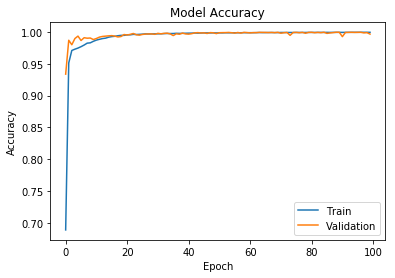

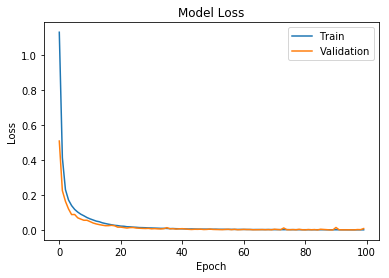

In [0]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
#plt.savefig('accHigh.svg')

# # Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
#plt.savefig('lossHigh.svg')

In [0]:
model = get_model()
#load best weights from current training
model.load_weights("weights/val1-73-0.9992.hdf5")

In [0]:
preds = model.predict(XchTest)

In [0]:
print preds.shape

(2598, 45, 6)


In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm = cm
        #print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
Yhot_pred = model.predict(XchTest)
#convert them to class numbers


In [0]:
Y_pred = np.argmax(preds, axis = 2)
Y_test = np.argmax(YhotTest, axis = 2)
print Y_pred.shape
print Y_test.shape

(2598, 45)
(2598, 45)


In [0]:
ans = 0
for i in range(Y_test.shape[0]):    
        for j in range(Y_test.shape[1]):
            if Y_test[i][j] == Y_pred[i][j]:
                ans = ans + 1    
print "Test Accuracy Framewise is"
#print ans
print(ans/float(Y_test.shape[0] * Y_test.shape[1]))*100  

Test Accuracy Framewise is
99.00436233


In [0]:
# use polling of 45 frames to get output for the sequence
ans = 0
res = []
act = []
for i in range(Y_test.shape[0]):
    resTemp = stats.mode(Y_pred[i])
    actTemp = stats.mode(Y_test[i])
    res.append(resTemp[0][0])
    act.append(actTemp[0][0])
    if res[i] == act[i]:
        ans = ans + 1
    """for j in range(Y_test.shape[1]):
        if Y_test[i][j] != Y_pred[i][j]:
            print Y_pred[i]
            break"""
                
print "Test Accuracy with Polling is"
#print ans
print(ans/float(Y_test.shape[0])*100)

Test Accuracy with Polling is
99.3841416474


In [0]:
Y_pred_flat = []
Y_test_flat = []
for i in range(Y_test.shape[0]):    
        for j in range(Y_test.shape[1]):
            Y_pred_flat.append(Y_pred[i][j])
            Y_test_flat.append(Y_test[i][j])

In [0]:
print res

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
asanas = {0:'bhujangasan', 1:'padamasan', 2:'shavasan', 3:'tadasan', 4:'trikonasan', 5:'vrikshasan'}
#uncomment for framewise
Y_asanas = np.array([asanas[a] for a in Y_test_flat])
Y_pred_asanas = np.array([asanas[a] for a in Y_pred_flat])
#Y_asanas = np.array([asanas[a] for a in act])
#Y_pred_asanas = np.array([asanas[a] for a in res])
print(Y_asanas)
print(Y_pred_asanas)

['bhujangasan' 'bhujangasan' 'bhujangasan' ..., 'vrikshasan' 'vrikshasan'
 'vrikshasan']
['bhujangasan' 'bhujangasan' 'bhujangasan' ..., 'tadasan' 'vrikshasan'
 'vrikshasan']


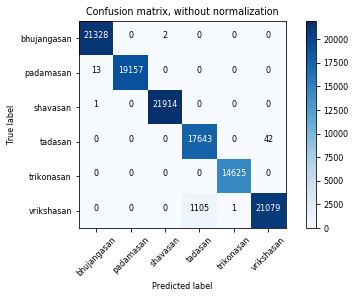

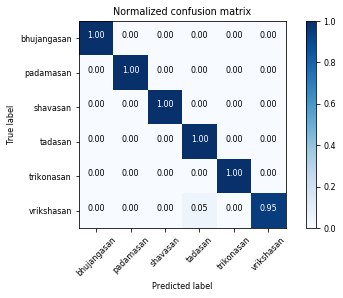

In [0]:
plt.rcParams.update({'font.size': 8})
class_names =[]
for k in range(6):
    class_names.append(asanas[k])
cnf_matrix = confusion_matrix(Y_asanas, Y_pred_asanas)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confHighFrame.svg')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('nconfHighFrame.svg')